In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_breast_cancer

# Problem 1

In [179]:
dia = pd.DataFrame(pd.read_csv(r'C:\Users\ccm51\Documents\ECGR_4105\diabetes.csv'))
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [180]:
np.random.seed(0)

dia_n = MinMaxScaler().fit_transform(dia)

df_train, df_test = train_test_split(dia_n, train_size = 0.8, test_size = 0.2)

X1 = df_train[:, 0:8]
Y1 = df_train[:, 8]
X1_val = df_test[:, 0:8]
Y1_val = df_test[:, 8]

In [181]:
C = [1000, 500, 200, 100, 50, 20, 10, 5, 4, 3, 2, 1, 0.5]
max_test_acc = 0
c_max_test = 0

for c in C:
    clf = LogisticRegression(C=c, solver='liblinear')
    clf.fit(X1, Y1)
    
    if clf.score(X1_val, Y1_val) > max_test_acc:
        c_max_test = c
        max_test_acc = clf.score(X1_val, Y1_val)
    
    print(f"""
C = {c}
Training Accuracy: {clf.score(X1, Y1)}
Test Accuracy: {clf.score(X1_val, Y1_val)}
""")

print(f"""
Max Test Accuracy: {max_test_acc}
C: {c_max_test}
""")

clf = LogisticRegression(C=c_max_test, solver='liblinear')
clf.fit(X1, Y1)


C = 1000
Training Accuracy: 0.762214983713355
Test Accuracy: 0.8246753246753247


C = 500
Training Accuracy: 0.762214983713355
Test Accuracy: 0.8246753246753247


C = 200
Training Accuracy: 0.762214983713355
Test Accuracy: 0.8246753246753247


C = 100
Training Accuracy: 0.762214983713355
Test Accuracy: 0.8246753246753247


C = 50
Training Accuracy: 0.7638436482084691
Test Accuracy: 0.8246753246753247


C = 20
Training Accuracy: 0.7654723127035831
Test Accuracy: 0.8246753246753247


C = 10
Training Accuracy: 0.760586319218241
Test Accuracy: 0.8311688311688312


C = 5
Training Accuracy: 0.762214983713355
Test Accuracy: 0.8246753246753247


C = 4
Training Accuracy: 0.760586319218241
Test Accuracy: 0.8246753246753247


C = 3
Training Accuracy: 0.758957654723127
Test Accuracy: 0.8246753246753247


C = 2
Training Accuracy: 0.760586319218241
Test Accuracy: 0.8116883116883117


C = 1
Training Accuracy: 0.760586319218241
Test Accuracy: 0.8051948051948052


C = 0.5
Training Accuracy: 0.75244299

LogisticRegression(C=10, solver='liblinear')

In [182]:
predicted = clf.predict(X1_val)

conM = confusion_matrix(Y1_val, predicted)
print(conM)

report = classification_report(Y1_val, predicted)
print(report)

[[99  8]
 [18 29]]
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.88       107
         1.0       0.78      0.62      0.69        47

    accuracy                           0.83       154
   macro avg       0.81      0.77      0.79       154
weighted avg       0.83      0.83      0.82       154



Text(0.5, 257.44, 'Predicted Label')

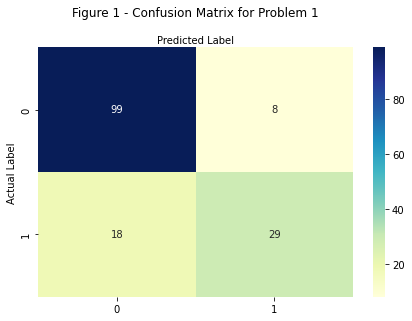

In [183]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conM), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Figure 1 - Confusion Matrix for Problem 1", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

# Problem 2

In [184]:
kfold5 = KFold(n_splits=5, random_state=0, shuffle=True)
model5 = LogisticRegression(solver='liblinear')
results5 = cross_val_score(model5, X1, Y1, cv=kfold5)

print(f"5 folds: Accuracy = {round(results5.mean()*100, 5)} ({round(results5.std()*100, 5)})")

kfold10 = KFold(n_splits=10, random_state=0, shuffle=True)
model10 = LogisticRegression(solver='liblinear')
results10 = cross_val_score(model10, X1, Y1, cv=kfold10)

print(f"10 folds: Accuracy = {round(results10.mean()*100, 5)} ({round(results10.std()*100, 5)})")

5 folds: Accuracy = 74.92603 (5.39848)
10 folds: Accuracy = 74.27023 (5.65033)


# Problem 3

In [185]:
canc = pd.DataFrame(load_breast_cancer().data)
labels = np.reshape(load_breast_cancer().target, (np.size(load_breast_cancer().target), 1))
canc_data = np.concatenate([canc, labels], axis=1)
canc.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [186]:
np.random.seed(0)

canc_data_n = MinMaxScaler().fit_transform(canc_data)

canc_train, canc_test = train_test_split(canc_data_n, train_size = 0.8, test_size = 0.2)

X3 = canc_train[:, 0:canc_data_n.shape[1]-1]
Y3 = canc_train[:, canc_data_n.shape[1]-1]
X3_val = canc_test[:, 0:canc_data_n.shape[1]-1]
Y3_val = canc_test[:, canc_data_n.shape[1]-1]

In [187]:
C = [1000, 500, 200, 100, 50, 20, 10, 5, 4, 3, 2, 1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01]


for c in C:
    clf = LogisticRegression(C=c, solver='liblinear')
    clf.fit(X3, Y3)
    
    if clf.score(X3_val, Y3_val) > max_test_acc:
        c_max_test = c
        max_test_acc = clf.score(X3_val, Y3_val)
    
    print(f"""
C = {c}
Training Accuracy: {clf.score(X3, Y3)}
Test Accuracy: {clf.score(X3_val, Y3_val)}
""")

print(f"""
Max Test Accuracy: {max_test_acc}
C: {c_max_test}
""")

clf = LogisticRegression(C=c_max_test, solver='liblinear')
clf.fit(X3, Y3)


C = 1000
Training Accuracy: 0.9868131868131869
Test Accuracy: 0.9649122807017544


C = 500
Training Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158


C = 200
Training Accuracy: 0.989010989010989
Test Accuracy: 0.9736842105263158


C = 100
Training Accuracy: 0.989010989010989
Test Accuracy: 0.9736842105263158


C = 50
Training Accuracy: 0.989010989010989
Test Accuracy: 0.9736842105263158


C = 20
Training Accuracy: 0.989010989010989
Test Accuracy: 0.9649122807017544


C = 10
Training Accuracy: 0.9824175824175824
Test Accuracy: 0.9649122807017544


C = 5
Training Accuracy: 0.9824175824175824
Test Accuracy: 0.9649122807017544


C = 4
Training Accuracy: 0.978021978021978
Test Accuracy: 0.9649122807017544


C = 3
Training Accuracy: 0.978021978021978
Test Accuracy: 0.956140350877193


C = 2
Training Accuracy: 0.9736263736263736
Test Accuracy: 0.956140350877193


C = 1
Training Accuracy: 0.967032967032967
Test Accuracy: 0.956140350877193


C = 0.5
Training Accuracy: 0.95164835

LogisticRegression(C=500, solver='liblinear')

In [188]:
predicted_canc = clf.predict(X3_val)

conM3 = confusion_matrix(Y3_val, predicted_canc)
print(conM3)

report3 = classification_report(Y3_val, predicted_canc)
print(report3)

[[45  2]
 [ 1 66]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        47
         1.0       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(0.5, 257.44, 'Predicted Label')

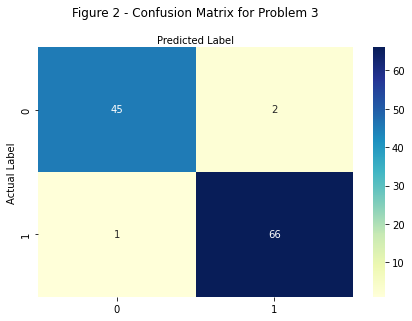

In [189]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conM3), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Figure 2 - Confusion Matrix for Problem 3", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [190]:
max_test_acc = 0
c_max_test = 0

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X3, Y3)
    
    if clf.score(X3_val, Y3_val) > max_test_acc:
        c_max_test = c
        max_test_acc = clf.score(X3_val, Y3_val)
    
    print(f"""
C = {c}
Training Accuracy: {clf.score(X3, Y3)}
Test Accuracy: {clf.score(X3_val, Y3_val)}
""")

print(f"""
Max Test Accuracy: {max_test_acc}
C: {c_max_test}
""")

clf = LogisticRegression(penalty='l1', C=c_max_test, solver='liblinear')
clf.fit(X3, Y3)


C = 1000
Training Accuracy: 0.9978021978021978
Test Accuracy: 0.9473684210526315


C = 500
Training Accuracy: 0.989010989010989
Test Accuracy: 0.9473684210526315


C = 200
Training Accuracy: 0.989010989010989
Test Accuracy: 0.956140350877193


C = 100
Training Accuracy: 0.989010989010989
Test Accuracy: 0.956140350877193


C = 50
Training Accuracy: 0.9846153846153847
Test Accuracy: 0.956140350877193


C = 20
Training Accuracy: 0.989010989010989
Test Accuracy: 0.9649122807017544


C = 10
Training Accuracy: 0.989010989010989
Test Accuracy: 0.956140350877193


C = 5
Training Accuracy: 0.9846153846153847
Test Accuracy: 0.9649122807017544


C = 4
Training Accuracy: 0.9846153846153847
Test Accuracy: 0.9649122807017544


C = 3
Training Accuracy: 0.9802197802197802
Test Accuracy: 0.9649122807017544


C = 2
Training Accuracy: 0.9802197802197802
Test Accuracy: 0.9736842105263158


C = 1
Training Accuracy: 0.9714285714285714
Test Accuracy: 0.9649122807017544


C = 0.5
Training Accuracy: 0.9582417

LogisticRegression(C=2, penalty='l1', solver='liblinear')

In [191]:
predicted_canc_pen = clf.predict(X3_val)

conM3_pen = confusion_matrix(Y3_val, predicted_canc_pen)
print(conM3_pen)

report3_pen = classification_report(Y3_val, predicted_canc_pen)
print(report3_pen)

[[45  2]
 [ 1 66]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        47
         1.0       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(0.5, 257.44, 'Predicted Label')

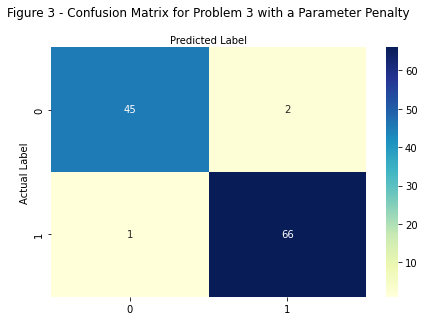

In [192]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conM3_pen), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Figure 3 - Confusion Matrix for Problem 3 with a Parameter Penalty", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

# Problem 4

In [193]:
canc_kfold5 = KFold(n_splits=5, random_state=0, shuffle=True)
canc_model5 = LogisticRegression(solver='liblinear')
canc_results5 = cross_val_score(canc_model5, X3, Y3, cv=canc_kfold5)

print(f"5 folds: Accuracy = {round(canc_results5.mean()*100, 5)} ({round(canc_results5.std()*100, 5)})")

canc_kfold10 = KFold(n_splits=10, random_state=0, shuffle=True)
canc_model10 = LogisticRegression(solver='liblinear')
canc_results10 = cross_val_score(canc_model10, X3, Y3, cv=canc_kfold10)

print(f"10 folds: Accuracy = {round(canc_results10.mean()*100, 5)} ({round(canc_results10.std()*100, 5)})")

canc_model5_pen = LogisticRegression(penalty='l1', solver='liblinear')
canc_results5_pen = cross_val_score(canc_model5_pen, X3, Y3, cv=canc_kfold5)

print(f"5 folds with a Parameter Penalty: Accuracy = {round(canc_results5_pen.mean()*100, 5)} ({round(canc_results5_pen.std()*100, 5)})")

canc_model10_pen = LogisticRegression(penalty='l1', solver='liblinear')
canc_results10_pen = cross_val_score(canc_model10_pen, X3, Y3, cv=canc_kfold10)

print(f"10 folds with a Parameter Penalty: Accuracy = {round(canc_results10_pen.mean()*100, 5)} ({round(canc_results10_pen.std()*100, 5)})")

5 folds: Accuracy = 95.38462 (1.28153)
10 folds: Accuracy = 95.38164 (3.49788)
5 folds with a Parameter Penalty: Accuracy = 96.04396 (1.49062)
10 folds with a Parameter Penalty: Accuracy = 96.27053 (2.60259)
